In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [72]:
n_datapoints = 10
np.random.seed(1)
x = 10 * np.random.rand(n_datapoints)
y = 2 * x + 1 + (3 * np.random.randn(n_datapoints))

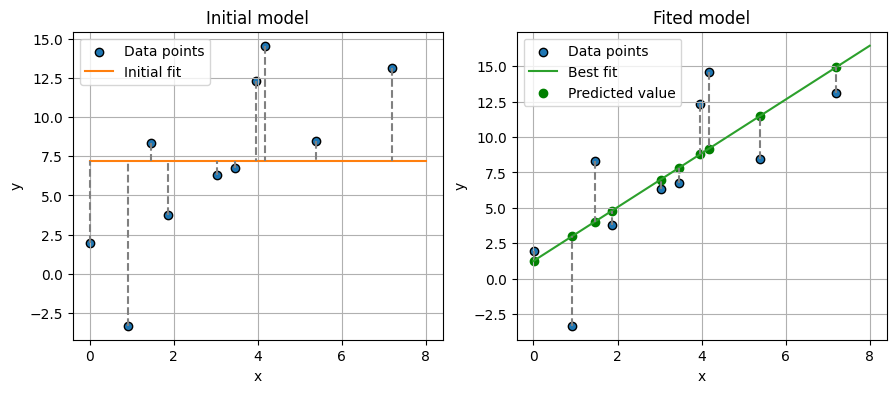

In [249]:
ols_model = LinearRegression(fit_intercept=True)
ols_model.fit(x[:, np.newaxis], y)
# get prediction
y_pred = ols_model.predict(x[:, np.newaxis])

residual = y - y_pred

# get prediction for best line fit
xfit = np.linspace(0, 8, 50)
y_ = ols_model.predict(xfit[:, np.newaxis])

fig, axs = plt.subplots(1, 2, figsize=(10.5, 4))

ax = axs[0]
ax.scatter(
    x,
    y,
    label="Data points",
    edgecolors="k",
)

# plot data
ax.plot(
    [0, 8],
    [y.mean(), y.mean()],
    color="#ff7f0e",
    label="Initial fit",
)
for i in range(len(x)):
    ax.plot(
        [x[i], x[i]],
        [y[i], y.mean()],
        color="gray",
        linestyle="--",
    )
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax.set_title("Initial model")

ax = axs[1]
ax.scatter(
    x,
    y,
    label="Data points",
    edgecolors="k",
)
# plot best line fit
ax.plot(
    xfit,
    y_,
    color="#2ca02c",
    label="Best fit",
)
# Optionally, plot residuals (errors)
for i in range(len(x)):
    ax.plot(
        [x[i], x[i]],
        [y[i], y_pred[i]],
        color="gray",
        linestyle="--",
    )
ax.scatter(
    x, y_pred, color="green", label="Predicted value"
)  # If you want to show where the predicted points lie on the line

ax.annotate(
    "residual",
    xy=(1, -10),
    xycoords="data",
    xytext=(0.2, 0.1),
    textcoords="axes fraction",
    va="top",
    ha="left",
    fontsize=16,
    arrowprops=dict(
        arrowstyle="->",
        facecolor="black",
    ),
)

ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Fited model")
ax.legend()
plt.show()

In [70]:
data = sp.odr.Data(x, y)

def linear_model(w, x):
    return w[0] + (w[1] * x)


model = sp.odr.Model(linear_model)
myodr = sp.odr.ODR(data, model, beta0=[0.1, 0.5])
myoutput = myodr.run()
myoutput.pprint()

Beta: [0.23565725 2.68421323]
Beta Std Error: [2.51359328 0.74967255]
Beta Covariance: [[ 3.00616762 -0.76449581]
 [-0.76449581  0.26740308]]
Residual Variance: 2.101729503048588
Inverse Condition #: 0.1375331105576127
Reason(s) for Halting:
  Sum of squares convergence


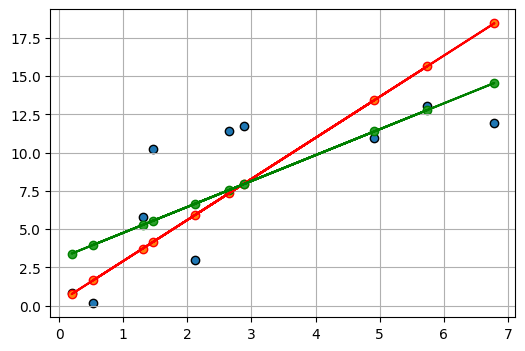

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

ax.scatter(
    x,
    y,
    label="Data points",
    edgecolors="k",
)

ax.scatter(
    x,
    linear_model(myoutput.beta, x),
    # label="Data points",
    edgecolors="r",
)
ax.plot(
    x,
    linear_model(myoutput.beta, x),
    # label="Data points",
    color="r",
)

ax.scatter(
    x,
    y_pred,
    # label="Data points",
    edgecolors="green",
)

ax.plot(
    x,
    y_pred,
    color="green",
)

ax.grid(True)

Test with centered data

In [274]:
def centering(Z: np.ndarray) -> np.ndarray:
    Z_min = Z.min(0)
    Z_max = Z.max(0)
    Z_norm = (Z - Z_min) / (Z_max - Z_min)
    Z_means = Z_norm.mean(axis=0, keepdims=True)

    def reverse_centering(Z_centered: np.ndarray) -> np.ndarray:
        Z_norm = Z_centered + Z_means
        Z = Z_norm * (Z_max - Z_min) + Z_min
        return Z

    return Z_norm - Z_means, reverse_centering

Z = np.column_stack((x, y))
Z_centered, reverse_centering = centering(Z)

Z, Z_centered

(array([[ 4.17022005e+00,  1.45748754e+01],
        [ 7.20324493e+00,  1.31228692e+01],
        [ 1.14374817e-03,  1.95940478e+00],
        [ 3.02332573e+00,  6.29854033e+00],
        [ 1.46755891e+00,  8.32144163e+00],
        [ 9.23385948e-01, -3.33365023e+00],
        [ 1.86260211e+00,  3.75795262e+00],
        [ 3.45560727e+00,  6.75905148e+00],
        [ 3.96767474e+00,  1.23366578e+01],
        [ 5.38816734e+00,  8.47666088e+00]]),
 array([[ 0.14217059,  0.41027917],
        [ 0.56330115,  0.32920012],
        [-0.43669885, -0.29416021],
        [-0.01707382, -0.0518658 ],
        [-0.2330895 ,  0.06109164],
        [-0.30864703, -0.58972083],
        [-0.1782384 , -0.19373051],
        [ 0.04294777, -0.02615117],
        [ 0.1140475 ,  0.28529861],
        [ 0.31128058,  0.06975898]]))

In [267]:
Z_ = reverse_centering(Z_centered)

assert ((Z - Z_) < 1e-10).all()

In [273]:
Z_centered

array([[-0.21056528,  0.21056528],
       [ 0.04053952, -0.04053952],
       [-0.14778031,  0.14778031],
       [-0.059115  ,  0.059115  ],
       [-0.22360156,  0.22360156],
       [ 0.06402591, -0.06402591],
       [-0.06876493,  0.06876493],
       [-0.04196152,  0.04196152],
       [-0.16213654,  0.16213654],
       [ 0.04424981, -0.04424981]])

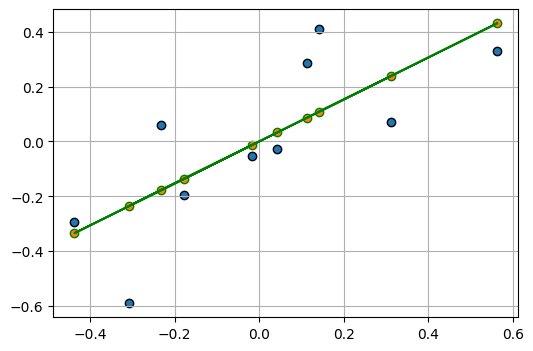

In [275]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))


ols_model_ = LinearRegression(fit_intercept=True)
ols_model_.fit(Z_centered[:, 0][:, np.newaxis], Z_centered[:, 1])
# get prediction
y_pred_ = ols_model_.predict(Z_centered[:, 0][:, np.newaxis])


ax.scatter(
    Z_centered[:, 0],
    Z_centered[:, 1],
    label="Data points",
    edgecolors="k",
)

ax.scatter(
    Z_centered[:, 0],
    y_pred_,
    # label="Data points",
    edgecolors="green",
)

ax.plot(
    Z_centered[:, 0],
    y_pred_,
    color="green",
)

ax.grid(True)

Test revert centering:
- plot predicted line based on reverted predictions
- plot predicted points based on original predictions

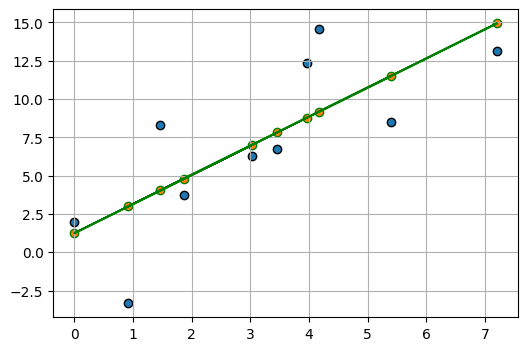

In [278]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

Z_centered_ = np.column_stack((Z_centered[:, 0], y_pred_))
Z_ = reverse_centering(Z_centered_)

ax.scatter(
    Z[:, 0],
    Z[:, 1],
    label="Data points",
    edgecolors="k",
)

ax.scatter(
    Z[:, 0],
    y_pred,
    # label="Data points",
    edgecolors="green",
)

ax.plot(
    Z_[:, 0],
    Z_[:, 1],
    color="green",
)

ax.grid(True)

Total least square on centered data

In [377]:
e_val, e_vec = np.linalg.eig(Z_centered.T @ Z_centered)
idx = e_val.argsort()[0]
u = e_vec[:, idx]
u = u[:, np.newaxis]
e_val, e_vec, idx, u

(array([0.20313455, 1.46039495]),
 array([[-0.71278528, -0.70138231],
        [ 0.70138231, -0.71278528]]),
 0,
 array([[-0.71278528],
        [ 0.70138231]]))

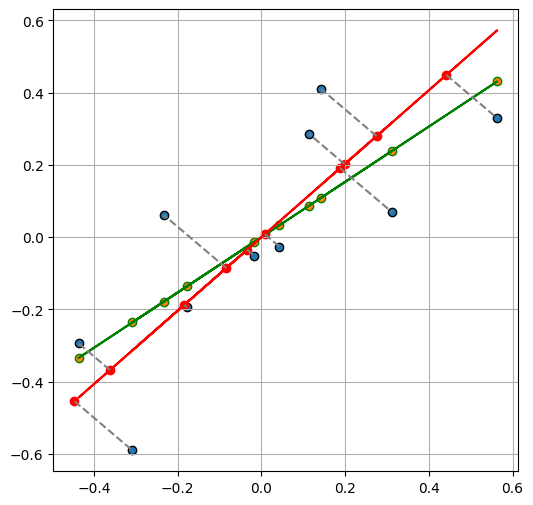

In [387]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.scatter(
    Z_centered[:, 0],
    Z_centered[:, 1],
    label="Data points",
    edgecolors="k",
)


ax.scatter(
    Z_centered[:, 0],
    y_pred_,
    # label="Data points",
    edgecolors="green",
)

ax.plot(
    Z_centered[:, 0],
    y_pred_,
    color="green",
)

negative_a_over_b = (-u[0] / u[1])[0]
y_pred__ = Z_centered[:, 0].dot(negative_a_over_b)
Z_centered_ = np.column_stack((Z_centered[:, 0], y_pred__))
ax.plot(
    Z_centered_[:, 0],
    Z_centered_[:, 1],
    "r-",
)
Z_centered_tls = -Z_centered.dot(u).dot(u.T)
X_tls_error = Z_centered_tls[:, :-1]
X_tls = Z_centered[:, 0][:, np.newaxis] + X_tls_error
y_pred_tls = (X_tls).dot(negative_a_over_b)

ax.scatter(
    X_tls,
    y_pred_tls,
    color="r",
)

for i in range(len(Z_centered)):
    plt.plot(
        [X_tls[i, 0], Z_centered[i, 0]],
        [y_pred_tls[i, 0], Z_centered[i, 1]],
        # marker="o",
        linestyle="--",
        color="gray",
        label="Line between Points",
    )

ax.grid(True)